# Training Data Inspector

Interactive notebook to explore training data downloaded from Modal volume.

Make sure you've downloaded the data first:
```bash
modal volume get pile-dataset-cache training_data.pkl ./training_data.pkl
```

In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import re
from typing import List

## Load Training Data

In [4]:
# Load the training data
file_path = "training_data_1k.pkl"  # Adjust path if needed

try:
    with open(file_path, "rb") as f:
        training_data = pickle.load(f)
    print(f"✅ Loaded {len(training_data)} training samples")
except FileNotFoundError:
    print(f"❌ File not found: {file_path}")
    print("Download first with: modal volume get pile-dataset-cache training_data.pkl ./training_data.pkl")
    training_data = []

✅ Loaded 9995 training samples


## Dataset Statistics

In [5]:
if training_data:
    # Basic stats
    char_lengths = [len(text) for text in training_data]
    word_lengths = [len(text.split()) for text in training_data]
    
    print(f"📊 Dataset Statistics:")
    print(f"   Total samples: {len(training_data):,}")
    print(f"   Total characters: {sum(char_lengths):,}")
    print(f"   Total words: {sum(word_lengths):,}")
    print(f"")
    print(f"   Character length:")
    print(f"     Mean: {np.mean(char_lengths):.1f}")
    print(f"     Median: {np.median(char_lengths):.1f}")
    print(f"     Min: {min(char_lengths)}")
    print(f"     Max: {max(char_lengths):,}")
    print(f"")
    print(f"   Word count:")
    print(f"     Mean: {np.mean(word_lengths):.1f}")
    print(f"     Median: {np.median(word_lengths):.1f}")
    print(f"     Min: {min(word_lengths)}")
    print(f"     Max: {max(word_lengths):,}")

📊 Dataset Statistics:
   Total samples: 9,995
   Total characters: 21,333,932
   Total words: 3,590,768

   Character length:
     Mean: 2134.5
     Median: 1151.0
     Min: 51
     Max: 69,815

   Word count:
     Mean: 359.3
     Median: 191.0
     Min: 7
     Max: 10,572


## Length Distribution Plots

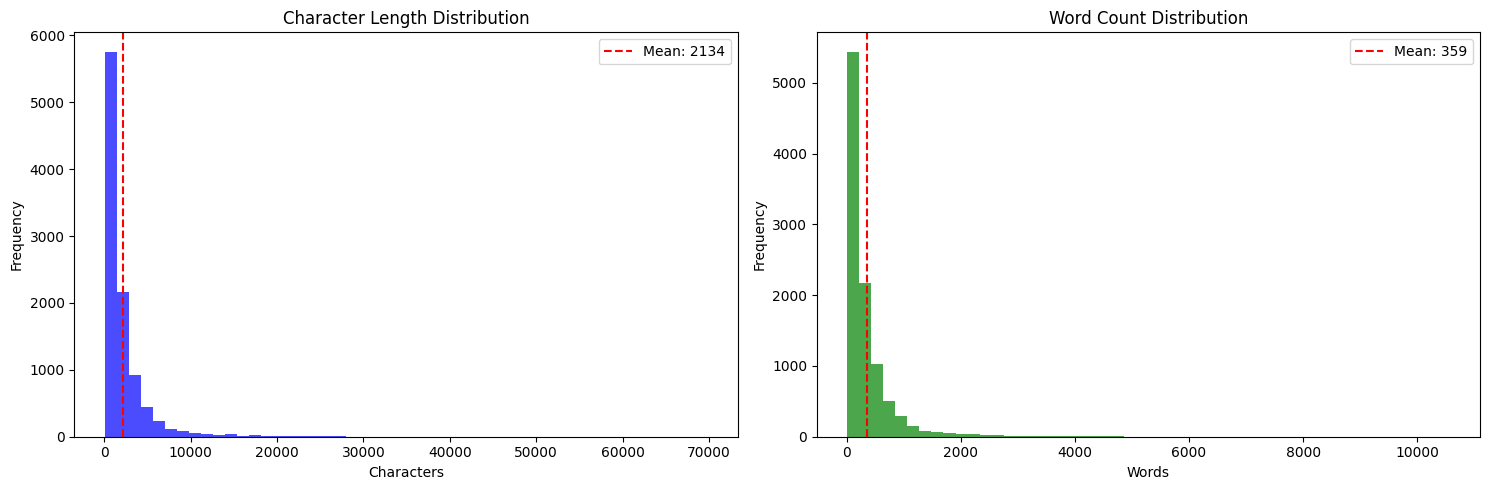

In [6]:
if training_data:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Character length distribution
    ax1.hist(char_lengths, bins=50, alpha=0.7, color='blue')
    ax1.set_xlabel('Characters')
    ax1.set_ylabel('Frequency')
    ax1.set_title('Character Length Distribution')
    ax1.axvline(np.mean(char_lengths), color='red', linestyle='--', label=f'Mean: {np.mean(char_lengths):.0f}')
    ax1.legend()
    
    # Word count distribution
    ax2.hist(word_lengths, bins=50, alpha=0.7, color='green')
    ax2.set_xlabel('Words')
    ax2.set_ylabel('Frequency')
    ax2.set_title('Word Count Distribution')
    ax2.axvline(np.mean(word_lengths), color='red', linestyle='--', label=f'Mean: {np.mean(word_lengths):.0f}')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()

## Sample Texts

In [7]:
# Show first few samples
if training_data:
    num_samples = 3
    print(f"📝 First {num_samples} samples:")
    
    for i, text in enumerate(training_data[:num_samples]):
        print(f"\n{'='*50}")
        print(f"Sample {i+1}")
        print(f"Length: {len(text)} chars, {len(text.split())} words")
        print(f"{'='*50}")
        print(text[:500] + ("..." if len(text) > 500 else ""))

📝 First 3 samples:

Sample 1
Length: 747 chars, 130 words
Beginners BBQ Class Taking Place in Missoula!
Do you want to get better at making delicious BBQ? You will have the opportunity, put this on your calendar now. Thursday, September 22nd join World Class BBQ Champion, Tony Balay from Lonestar Smoke Rangers. He will be teaching a beginner level class for everyone who wants to get better with their culinary skills.
He will teach you everything you need to know to compete in a KCBS BBQ competition, including techniques, recipes, timelines, meat select...

Sample 2
Length: 1628 chars, 308 words
Discussion in 'Mac OS X Lion (10.7)' started by axboi87, Jan 20, 2012.
I've got a 500gb internal drive and a 240gb SSD.
When trying to restore using disk utility i'm given the error "Not enough space on disk ____ to restore"
But I shouldn't have to do that!!!
Any ideas or workarounds before resorting to the above?
Use Carbon Copy Cloner to copy one drive to the other. I've done this several time

## Interactive Sample Viewer

In [8]:
# Function to view specific sample
def view_sample(index: int):
    if not training_data:
        print("No training data loaded")
        return
    
    if 0 <= index < len(training_data):
        text = training_data[index]
        print(f"Sample {index}:")
        print(f"Length: {len(text)} chars, {len(text.split())} words")
        print(f"\n{text}")
    else:
        print(f"Index out of range. Available indices: 0-{len(training_data)-1}")

# Example usage:
# view_sample(0)  # View first sample
# view_sample(10) # View 11th sample

## Search Functionality

In [10]:
def search_training_data(query: str, max_results: int = 5, context_chars: int = 200):
    """Search for text containing query and show context."""
    if not training_data:
        print("No training data loaded")
        return
    
    matches = []
    query_lower = query.lower()
    
    for i, text in enumerate(training_data):
        if query_lower in text.lower():
            matches.append((i, text))
            if len(matches) >= max_results:
                break
    
    print(f"🔍 Found {len(matches)} matches for '{query}' (showing first {max_results}):")
    
    for i, (idx, text) in enumerate(matches):
        # Find query position and show context
        pos = text.lower().find(query_lower)
        start = max(0, pos - context_chars//2)
        end = min(len(text), pos + len(query) + context_chars//2)
        context = text[start:end]
        
        print(f"\n--- Match {i+1} (Sample {idx}) ---")
        print(f"...{context}...")

# Example usage:
search_training_data("machine learning")
# search_training_data("python")

🔍 Found 5 matches for 'machine learning' (showing first 5):

--- Match 1 (Sample 338) ---
...e sustainable built environment, lies in the advances of sensor technology, big data gathering, and machine learning. Technology will enable us to move from big population models to tailor made solutions designed for...

--- Match 2 (Sample 1222) ---
...mbining online and offline knowledge in UCT[C]//Proceedings of the 24th international conference on Machine learning.ACM,2007:273-280....

--- Match 3 (Sample 1900) ---
...at computational scientists use to understand the world. He is particularly interested in combining machine learning and high-performance computing for physical science. He also contributes to related efforts in para...

--- Match 4 (Sample 2064) ---
...e self-described "cutting edge artificial intelligence company" that uses "the best techniques from machine learning and systems neuroscience to build powerful general-purpose learning algorithms: comes with a team o...

--- Ma

## Most Common Words

In [ ]:
if training_data:
    # Extract all words and count them
    all_text = " ".join(training_data[:100])  # Use first 100 samples for speed
    words = re.findall(r'\b\w+\b', all_text.lower())
    
    word_counts = Counter(words)
    common_words = word_counts.most_common(20)
    
    print(f"📈 Most common words (from first 100 samples):")
    for word, count in common_words:
        print(f"   {word}: {count}")
        
    # Plot most common words
    words_list, counts_list = zip(*common_words)
    plt.figure(figsize=(12, 6))
    plt.bar(words_list, counts_list)
    plt.xticks(rotation=45)
    plt.title('Most Common Words')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

## Export Sample for Analysis

In [ ]:
# Export first N samples to text file for external analysis
def export_samples(num_samples: int = 10, output_file: str = "sample_data.txt"):
    if not training_data:
        print("No training data loaded")
        return
    
    with open(output_file, "w", encoding="utf-8") as f:
        for i, text in enumerate(training_data[:num_samples]):
            f.write(f"=== SAMPLE {i+1} ===\n")
            f.write(f"Length: {len(text)} chars, {len(text.split())} words\n")
            f.write(f"{text}\n\n")
    
    print(f"Exported {min(num_samples, len(training_data))} samples to {output_file}")

# Example usage:
# export_samples(5, "first_5_samples.txt")